# Project(01)
## Name : Vaishnav Krishna P

## Handling Missing values

In [1127]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [1128]:
dataset = pd.read_csv("train.csv")
df = dataset.copy()

In [1129]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [1130]:
df.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

Removing constant features such as Passenger Id and Name. which does not contribute any importance in the prediction of the target feature

In [1131]:
ConstantFeatures = ["PassengerId","Name"]
df.drop(columns=ConstantFeatures,inplace=True)

In [1132]:
df.head(2)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True


### Handling missing values in Numerical_features

In [1133]:
NumericalFeatures = [features for features in df.columns if df[features].dtypes == "float64"]
NumericalFeatures

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [1134]:
for features in NumericalFeatures:
    median = df[features].median()
    df[features].fillna(median,inplace=True)

Imputting Numerical features with median of the features since all the features are right skewed(positively skewed).median is less effected by the extreme points 

In [1135]:
df.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64

In [1136]:
df["Age"] = df["Age"].astype("int")

In [1137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8693 non-null   int64  
 5   VIP           8490 non-null   object 
 6   RoomService   8693 non-null   float64
 7   FoodCourt     8693 non-null   float64
 8   ShoppingMall  8693 non-null   float64
 9   Spa           8693 non-null   float64
 10  VRDeck        8693 non-null   float64
 11  Transported   8693 non-null   bool   
dtypes: bool(1), float64(5), int64(1), object(5)
memory usage: 755.7+ KB


In [1138]:
df[NumericalFeatures].head(2)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39,0.0,0.0,0.0,0.0,0.0
1,24,109.0,9.0,25.0,549.0,44.0


### Handling categorical features

In [1139]:
CategoricalFeatures = [features for features in df.columns if df[features].dtype == "O"]
CategoricalFeatures

['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']

In [1140]:
for feature in CategoricalFeatures:
    if feature != "Cabin":
        mode = df[feature].mode()[0]
        df[feature].fillna(mode,inplace=True)

In [1141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   bool   
 2   Cabin         8494 non-null   object 
 3   Destination   8693 non-null   object 
 4   Age           8693 non-null   int64  
 5   VIP           8693 non-null   bool   
 6   RoomService   8693 non-null   float64
 7   FoodCourt     8693 non-null   float64
 8   ShoppingMall  8693 non-null   float64
 9   Spa           8693 non-null   float64
 10  VRDeck        8693 non-null   float64
 11  Transported   8693 non-null   bool   
dtypes: bool(3), float64(5), int64(1), object(3)
memory usage: 636.8+ KB


Except feature cabin, all features missing value is handled. cabin feature has mode than 6000 categories.so, it has very less importance in prediction of target feature.so, we can perform feature engineering on this feature by sepoarating in to deck,num,side.
* before that i am negletting the instances which is nan.since,it is not easy to predict the missing value of Cabin

In [1142]:
df.shape

(8693, 12)

In [1143]:
df.dropna(inplace=True)

In [1144]:
df.shape

(8494, 12)

In [1145]:
df.isnull().sum()

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

Handling of missing value completed

In [1146]:
df.head(2)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24,False,109.0,9.0,25.0,549.0,44.0,True


### Feature Engineering and feature selection

In [1147]:
type(df["Cabin"].str.split("/",expand=True))

pandas.core.frame.DataFrame

In [1148]:
df[["Deck","DeckNum","Side"]] = df["Cabin"].str.split("/",expand=True)

In [1149]:
df.drop(columns="Cabin",inplace=True)

In [1150]:
df.head(2)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,DeckNum,Side
0,Europa,False,TRAPPIST-1e,39,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,Earth,False,TRAPPIST-1e,24,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S


In [1151]:
df[["Deck","DeckNum","Side"]].info() # No missing values 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8494 entries, 0 to 8692
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Deck     8494 non-null   object
 1   DeckNum  8494 non-null   object
 2   Side     8494 non-null   object
dtypes: object(3)
memory usage: 265.4+ KB


* Exploring each feature in cabin

In [1152]:
df["Deck"].unique() 

array(['B', 'F', 'A', 'G', 'E', 'D', 'C', 'T'], dtype=object)

In [1153]:
df["Deck"].value_counts()

F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: Deck, dtype: int64

In [1154]:
df["Deck"].nunique()

8

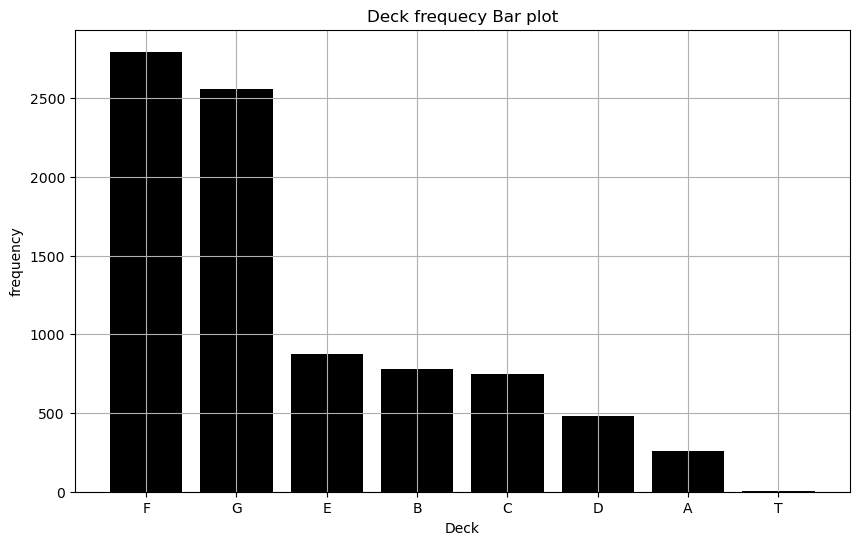

In [1155]:
x = df["Deck"].value_counts().index
y = df["Deck"].value_counts().values
plt.figure(figsize=(10,6))
plt.bar(x,y,color="k")
plt.title("Deck frequecy Bar plot")
plt.xlabel("Deck")
plt.ylabel("frequency")
plt.grid(True)
plt.show()

Here the frequency is not normal. frequancy is positively skewed or right skewed. have to aplly some transformationtechniques

In [1156]:
x = ["F","G","E","B","C","D","A","T"]
y = []
for i in range(df["Deck"].nunique()):
    n = (df["DeckNum"][df["Deck"] == x[i]]).nunique() # No of categories when x[0],x[1],...
    y.append(n)

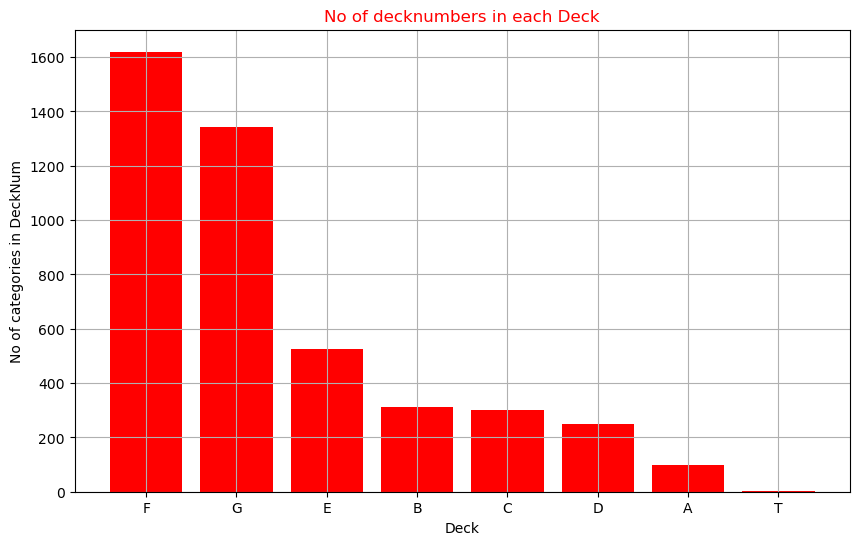

In [1157]:
plt.figure(figsize=(10,6))
plt.bar(x,y,color="r")
plt.xlabel("Deck")
plt.ylabel("No of categories in DeckNum")
plt.title("No of decknumbers in each Deck",color="red")
plt.grid(True)
plt.show()

* we can neglet the Deck side feature.beacause it is higly coreleted to the deck feature and there is a chance of over fitting if we include it.

In [1158]:
df.head(1)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,DeckNum,Side
0,Europa,False,TRAPPIST-1e,39,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P


In [1159]:
df.drop(columns="DeckNum",inplace=True)

In [1160]:
df.head(2)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side
0,Europa,False,TRAPPIST-1e,39,False,0.0,0.0,0.0,0.0,0.0,False,B,P
1,Earth,False,TRAPPIST-1e,24,False,109.0,9.0,25.0,549.0,44.0,True,F,S


In [1161]:
df["Side"].unique()

array(['P', 'S'], dtype=object)

In [1162]:
df['Side'].value_counts()

S    4288
P    4206
Name: Side, dtype: int64

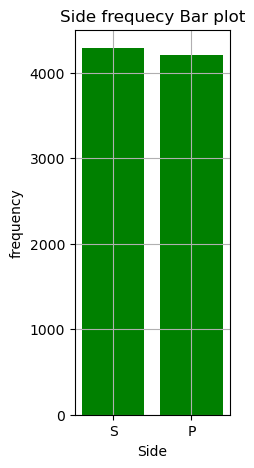

In [1163]:
x = df["Side"].value_counts().index
y = df["Side"].value_counts().values
plt.figure(figsize=(2,5))
plt.bar(x,y,color="green")
plt.title("Side frequecy Bar plot")
plt.xlabel("Side")
plt.ylabel("frequency")
plt.grid(True)
plt.show()

Almost similar number of s and p

priliminary feature engineering,feature selection,missing value handling completed 

In [1164]:
df.head(2)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side
0,Europa,False,TRAPPIST-1e,39,False,0.0,0.0,0.0,0.0,0.0,False,B,P
1,Earth,False,TRAPPIST-1e,24,False,109.0,9.0,25.0,549.0,44.0,True,F,S


### Encoding of categorical features

In [1165]:
CategoricalFeatures = [features for features in df.columns if df[features].dtype in ["O","bool"]]
CategoricalFeatures

['HomePlanet',
 'CryoSleep',
 'Destination',
 'VIP',
 'Transported',
 'Deck',
 'Side']

In [1166]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [1167]:
for features in CategoricalFeatures:
    df[features] = encoder.fit_transform(df[features])

In [1168]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side
0,1,0,2,39,0,0.0,0.0,0.0,0.0,0.0,0,1,0
1,0,0,2,24,0,109.0,9.0,25.0,549.0,44.0,1,5,1
2,1,0,2,58,1,43.0,3576.0,0.0,6715.0,49.0,0,0,1
3,1,0,2,33,0,0.0,1283.0,371.0,3329.0,193.0,0,0,1
4,0,0,2,16,0,303.0,70.0,151.0,565.0,2.0,1,5,1


### Corelation analysis

In [1169]:
CorelationMatrix = df[NumericalFeatures].corr()
CorelationMatrix

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
Age,1.000000,0.070548,0.126903,0.034053,0.119239,0.099744
RoomService,0.070548,1.000000,-0.017437,0.052271,0.013026,-0.019322
FoodCourt,0.126903,-0.017437,1.000000,-0.012857,0.216806,0.220657
ShoppingMall,0.034053,0.052271,-0.012857,1.000000,0.016642,-0.007738
Spa,0.119239,0.013026,0.216806,0.016642,1.000000,0.149628
VRDeck,0.099744,-0.019322,0.220657,-0.007738,0.149628,1.000000


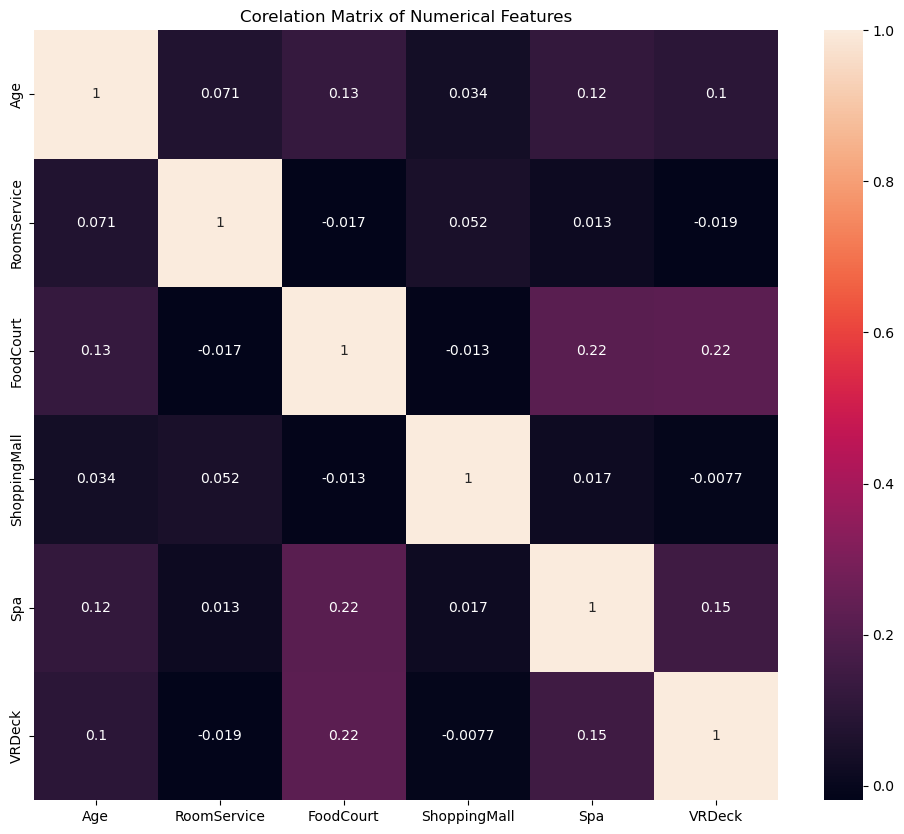

In [1170]:
plt.figure(figsize=(12,10))
sns.heatmap(CorelationMatrix,annot=True)
plt.title("Corelation Matrix of Numerical Features")
plt.show()

so,Numerical features are not multicolinear.

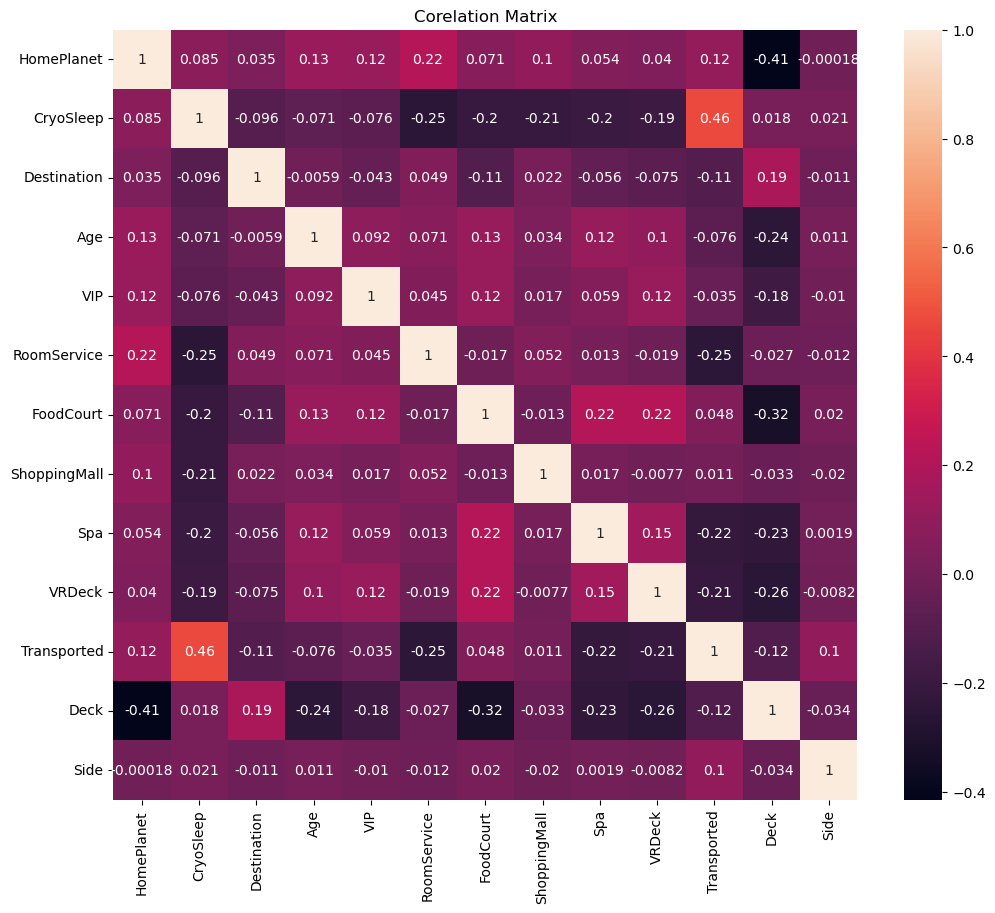

In [1171]:
CorelationMatrix = df.corr()
CorelationMatrix
plt.figure(figsize=(12,10))
sns.heatmap(CorelationMatrix,annot=True)
plt.title("Corelation Matrix")
plt.show()

* features "VIP","FoodCourt","ShoppingMall" and "Age" has very less corelation to target variable as compare with other features.
* highly corelated features (to target feature): "CryoSleep"(0.46)
* next to cryosleep: neg -> Spa,VRDECK,"RoomService"
* prediction: It's possible that passengers who spent more on spa services or room service were more likely to be engaged in relaxation and leisure activities before the anomaly occurred. As a result, they might be less likely to be "transported" or affected by the anomaly.
* Precautionary Measures:
Passengers who opted for cryosleep might have been aware of the impending anomaly and chose cryosleep as a precautionary measure. This could be due to safety protocols or recommendations from the spaceship's authorities.

### Scaling the Numerical features

In [1172]:
age_bins = [-1,3,18,25,50,80]
age_label = ["baby","Children","YoungAdult","Adult","Seniors"]
df["AgeCategory"] = pd.cut(df["Age"],bins=age_bins,labels=age_label) 

In [1173]:
bins = [-10,1,500,5000,100000]
for features in NumericalFeatures:
    if features != "Age":
        df[features+"Category"] = pd.cut(df[features],bins=bins,labels=["NotPaid","Paid","VIP","VVIP"])

In [1174]:
df.drop(columns=NumericalFeatures,inplace=True)

In [1175]:
df.head()

,HomePlanet,CryoSleep,Destination,VIP,Transported,Deck,Side,AgeCategory,RoomServiceCategory,FoodCourtCategory,ShoppingMallCategory,SpaCategory,VRDeckCategory
0,1,0,2,0,0,1,0,Adult,NotPaid,NotPaid,NotPaid,NotPaid,NotPaid
1,0,0,2,0,1,5,1,YoungAdult,Paid,Paid,Paid,VIP,Paid
2,1,0,2,1,0,0,1,Seniors,Paid,VIP,NotPaid,VVIP,Paid
3,1,0,2,0,0,0,1,Adult,NotPaid,VIP,Paid,VIP,Paid
4,0,0,2,0,1,5,1,Children,Paid,Paid,Paid,VIP,Paid


In [1176]:
CategoriesToEncode = ["AgeCategory","RoomServiceCategory","FoodCourtCategory","ShoppingMallCategory","SpaCategory","VRDeckCategory"]

In [1177]:
df.isnull().sum()

HomePlanet              0
CryoSleep               0
Destination             0
VIP                     0
Transported             0
Deck                    0
Side                    0
AgeCategory             0
RoomServiceCategory     0
FoodCourtCategory       0
ShoppingMallCategory    0
SpaCategory             0
VRDeckCategory          0
dtype: int64

In [1178]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [1179]:
for features in CategoriesToEncode:
    df[features] = encoder.fit_transform(df[features])

In [1180]:
df.head(10)

,HomePlanet,CryoSleep,Destination,VIP,Transported,Deck,Side,AgeCategory,RoomServiceCategory,FoodCourtCategory,ShoppingMallCategory,SpaCategory,VRDeckCategory
0,1,0,2,0,0,1,0,0,0,0,0,0,0
1,0,0,2,0,1,5,1,3,1,1,1,2,1
2,1,0,2,1,0,0,1,2,1,2,0,3,1
3,1,0,2,0,0,0,1,0,0,2,1,2,1
4,0,0,2,0,1,5,1,1,1,1,1,2,1
5,0,0,1,0,1,5,0,0,0,1,0,1,0
6,0,0,2,0,1,5,1,0,1,2,1,0,0
7,0,1,2,0,1,6,1,0,0,0,0,0,0
8,0,0,2,0,1,5,1,0,0,2,1,1,0
9,1,1,0,0,1,1,0,1,0,0,0,0,0


now to we can try with this dataset to train the model.and analyse any mistake is there or not 

In [1181]:
df.shape

(8494, 13)

In [1182]:
# removing less relevent features 
df.drop(columns= ["VIP","FoodCourtCategory","ShoppingMallCategory","AgeCategory"],inplace=True)
df.head(2)

,HomePlanet,CryoSleep,Destination,Transported,Deck,Side,RoomServiceCategory,SpaCategory,VRDeckCategory
0,1,0,2,0,1,0,0,0,0
1,0,0,2,1,5,1,1,2,1


In [1183]:
### train test split 
from sklearn.model_selection import train_test_split

In [1184]:
X = df.drop(columns=["Transported"])
Y = df["Transported"]

In [1185]:
df.head()

,HomePlanet,CryoSleep,Destination,Transported,Deck,Side,RoomServiceCategory,SpaCategory,VRDeckCategory
0,1,0,2,0,1,0,0,0,0
1,0,0,2,1,5,1,1,2,1
2,1,0,2,0,0,1,1,3,1
3,1,0,2,0,0,1,0,2,1
4,0,0,2,1,5,1,1,2,1


In [1186]:
X.head(2)

,HomePlanet,CryoSleep,Destination,Deck,Side,RoomServiceCategory,SpaCategory,VRDeckCategory
0,1,0,2,1,0,0,0,0
1,0,0,2,5,1,1,2,1


In [1187]:
pd.DataFrame(Y).head()

,Transported
0,0
1,1
2,0
3,0
4,1


### applying transformation functions: 
1. MinMaxScaler
2. Normalizer
3. StanderdScaler
4. Log Transformation(effecent for skewed data) 

In [1188]:
# log transformation
#for feature in df.columns:
 #   df[feature] = np.log1p(df[feature])
# over all minmax scaler works well 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X)

In [1189]:
df.isnull().sum()

HomePlanet             0
CryoSleep              0
Destination            0
Transported            0
Deck                   0
Side                   0
RoomServiceCategory    0
SpaCategory            0
VRDeckCategory         0
dtype: int64

In [1190]:
X.shape[0], Y.shape[0]

(8494, 8494)

In [1191]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=42)

In [1192]:
print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)
print("Y_train shape: ",Y_train.shape)
print("Y_test shape: ",Y_test.shape)

X_train shape:  (6795, 8)
X_test shape:  (1699, 8)
Y_train shape:  (6795,)
Y_test shape:  (1699,)


### Spot check with 5 algorithms 
1. Logistic Regression
2. Decision Tree Classifier 
3. Random Forest Classifier
4. SVM
5. Naive Bais
6. XGB Classfier

In [1193]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [1194]:
labels = ["LogisticRegression","RandomForestClassifer","DecisionTreeClassifier","SVC","GaussianNB","XGB"]
accuracy_list = []
model = LogisticRegression()
model.fit(X_train,Y_train)
prediction = model.predict(X_test)    
accuracy = accuracy_score(prediction,Y_test)
accuracy_list.append(accuracy)

model = DecisionTreeClassifier()
model.fit(X_train,Y_train)
prediction = model.predict(X_test)    
accuracy = accuracy_score(prediction,Y_test)
accuracy_list.append(accuracy)


model = DecisionTreeClassifier()
model.fit(X_train,Y_train)
prediction = model.predict(X_test)    
accuracy = accuracy_score(prediction,Y_test)
accuracy_list.append(accuracy)

model = SVC()
model.fit(X_train,Y_train)
prediction = model.predict(X_test)    
accuracy = accuracy_score(prediction,Y_test)
accuracy_list.append(accuracy)

model = GaussianNB()
model.fit(X_train,Y_train)
prediction = model.predict(X_test)    
accuracy = accuracy_score(prediction,Y_test)
accuracy_list.append(accuracy)

model = XGBClassifier()
model.fit(X_train,Y_train)
prediction = model.predict(X_test)    
accuracy = accuracy_score(prediction,Y_test)
accuracy_list.append(accuracy)

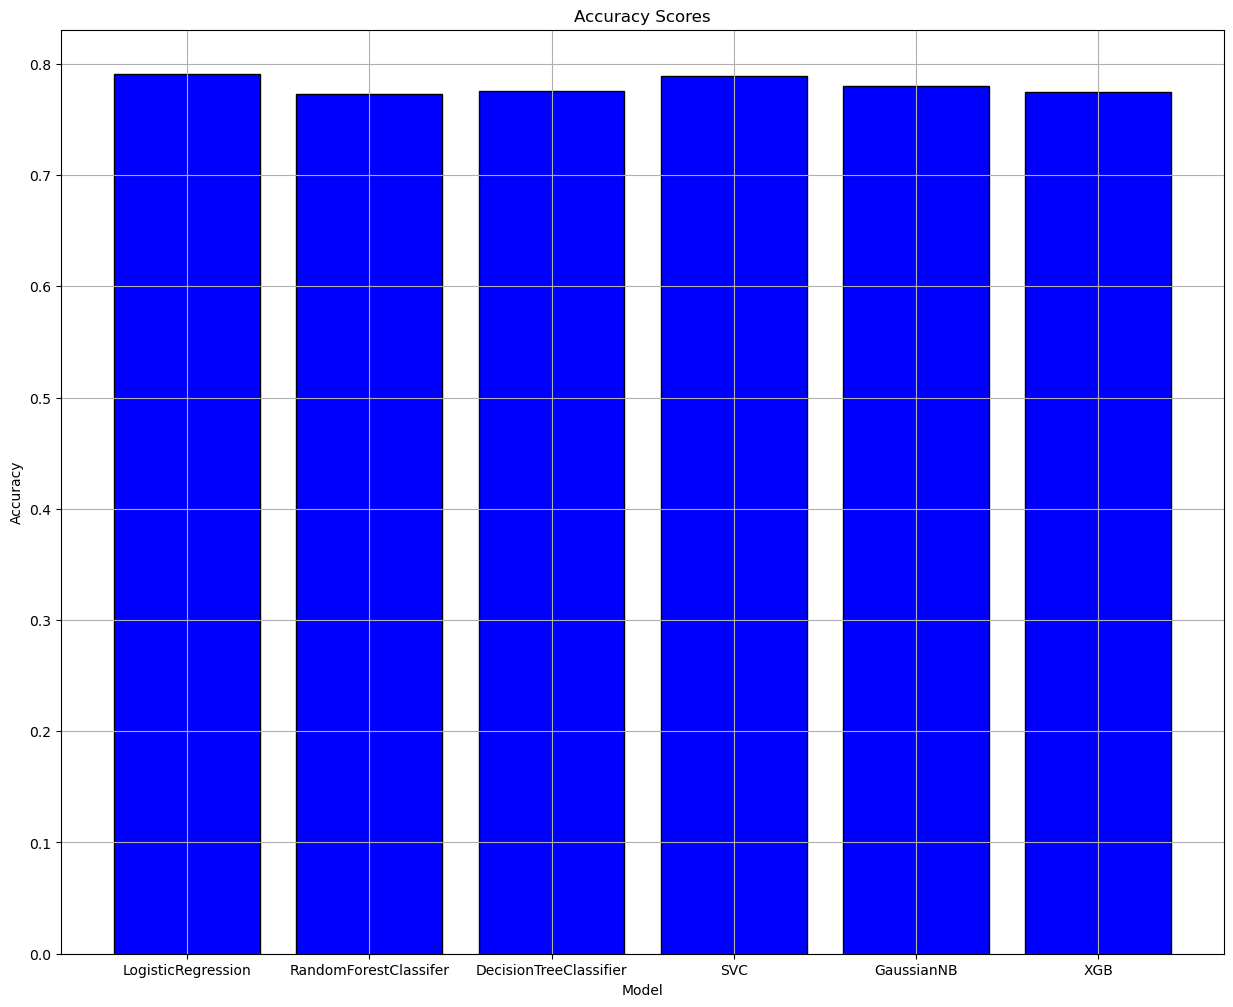

In [1195]:
plt.figure(figsize=(15,12))
plt.title("Accuracy Scores")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.bar(labels,accuracy_list,color="blue",edgecolor="k")
plt.grid(True)
plt.show()

In [1196]:
X.head()

,0,1,2,3,4,5,6,7
0,0.5,0.0,1.0,0.142857,0.0,0.000000,0.000000,0.000000
1,0.0,0.0,1.0,0.714286,1.0,0.333333,0.666667,0.333333
2,0.5,0.0,1.0,0.000000,1.0,0.333333,1.000000,0.333333
3,0.5,0.0,1.0,0.000000,1.0,0.000000,0.666667,0.333333
4,0.0,0.0,1.0,0.714286,1.0,0.333333,0.666667,0.333333


In [1197]:
accuracy_list

[0.7910535609181871,
 0.7728075338434374,
 0.7751618599175986,
 0.7886992348440259,
 0.7798705120659212,
 0.7745732783990583]

* first try without applying transformation

[0.785167745732784, - Logistic
 0.7569158328428487, - RFC
 0.7598587404355504, - DTC
 0.7910535609181871,  - SVC
 0.7680988816951148   - GaussianNB]
 
* after removing less relevant features - over all performance improved a little - High
[0.7898763978811065, - Logistic
 0.772218952324897, 
 0.7728075338434374,
 0.7886992348440259,  SVC
 0.7798705120659212,
 0.7745732783990583] - added xgb
 
 * when i add Missing label instead of removing in Cabin my overall accuracy decreases 
 [0.7596319723979299,
 0.7671075330649799,
 0.7671075330649799,
 0.7671075330649799,
 0.7619321449108684,
 0.7711328349626222]
 
 * when i apply transformation(MInMax Transformation) accuracy  of Logerthemic transformation increases 
 [0.7910535609181871,
 0.7745732783990583,
 0.7751618599175986,
 0.7886992348440259,
 0.7798705120659212,
 0.7745732783990583]

* when i apply standerd scaler my SVM accuracy increases logistic have no change
[0.7898763978811065,
 0.7728075338434374,
 0.7728075338434374,
 0.7939964685108888,
 0.7798705120659212,
 0.7745732783990583]

* when i apply normalizer i got accuracy not improved 
[0.7763390229546793,
 0.7728075338434374,
 0.7728075338434374,
 0.7792819305473808,
 0.7675103001765744,
 0.7798705120659212]
 
* after applying logerthemic function
[0.7839905826957033,
 0.7745732783990583,
 0.7751618599175986,
 0.7810476751030018,
 0.772218952324897,
 0.7745732783990583]

import numpy as np
import matplotlib.pyplot as plt

#### Generate a skewed dataset
skewed_data = np.random.exponential(scale=2, size=1000)

##### Apply logarithmic transformation
log_transformed_data = np.log1p(skewed_data) # zero can also be handled

##### Plot the original and transformed distributions
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(skewed_data, bins=50, color='blue', edgecolor='black')
plt.title('Skewed Data')

plt.subplot(1, 2, 2)
plt.hist(log_transformed_data, bins=50, color='green', edgecolor='black')
plt.title('Log-Transformed Data')

plt.show()



import numpy as np
import matplotlib.pyplot as plt

#### Generate a skewed dataset
skewed_data = np.random.exponential(scale=2, size=1000)

#### Apply logarithmic transformation
log_transformed_data = np.log1p(skewed_data)

#### Plot the original and transformed distributions
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(skewed_data, bins=50, color='blue', edgecolor='black')
plt.title('Skewed Data')

plt.subplot(1, 2, 2)
plt.hist(log_transformed_data, bins=50, color='green', edgecolor='black')
plt.title('Log-Transformed Data')

plt.show()


In [1198]:
# current best accuracy is 79.105 not bad 